In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import time
from tqdm import tqdm

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
from openpyxl import Workbook

In [4]:
# matplotlib에서 한글 폰트를 사용하기 위한 코드

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [5]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210101"
response = urlopen(url)

soup = BeautifulSoup(response, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210101" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <me

In [6]:
# 영화제목 태그
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=197647" title="가나의 혼인잔치: 언약">가나의 혼인잔치: 언약</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=182525" title="언플랜드">언플랜드</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=196843" title="극장판 바이올렛 에버가든">극장판 바이올렛 에버가든</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=194334" title="부활: 그 증거">부활: 그 증거</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=192066" title="소년시절의 너">소년시절의 너</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=195687" title="페이트 스테이 나이트 헤븐즈필 III.스프링 송">페이트 스테이 나이트 헤븐즈필 III.스프링 송</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=17796" title="일 포스티노">일 포스티노</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=17942" title="제리 맥과이어">제리 맥과이어</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.naver?code=13957" title="사랑의 블랙홀">사랑의 블랙홀</a>
 </div>, <div class="

In [7]:
# 영화 평점 태그
soup.find_all("td", "point")

[<td class="point">9.59</td>,
 <td class="point">9.52</td>,
 <td class="point">9.49</td>,
 <td class="point">9.40</td>,
 <td class="point">9.39</td>,
 <td class="point">9.26</td>,
 <td class="point">9.16</td>,
 <td class="point">9.16</td>,
 <td class="point">9.15</td>,
 <td class="point">9.12</td>,
 <td class="point">9.07</td>,
 <td class="point">9.06</td>,
 <td class="point">9.06</td>,
 <td class="point">9.05</td>,
 <td class="point">9.04</td>,
 <td class="point">9.04</td>,
 <td class="point">9.00</td>,
 <td class="point">8.98</td>,
 <td class="point">8.96</td>,
 <td class="point">8.93</td>,
 <td class="point">8.91</td>,
 <td class="point">8.89</td>,
 <td class="point">8.80</td>,
 <td class="point">8.72</td>,
 <td class="point">8.70</td>,
 <td class="point">8.66</td>,
 <td class="point">8.65</td>,
 <td class="point">8.63</td>,
 <td class="point">8.61</td>,
 <td class="point">8.59</td>,
 <td class="point">8.50</td>,
 <td class="point">8.43</td>,
 <td class="point">8.36</td>,
 <td class

In [8]:
# 영화제목 리스트

end = len(soup.find_all('div','tit5'))
movie_name = [soup.select('.tit5')[n].a.text for n in range(0,end)]
movie_name

['가나의 혼인잔치: 언약',
 '언플랜드',
 '극장판 바이올렛 에버가든',
 '부활: 그 증거',
 '소년시절의 너',
 '페이트 스테이 나이트 헤븐즈필 III.스프링 송',
 '일 포스티노',
 '제리 맥과이어',
 '사랑의 블랙홀',
 '러브레터',
 '타오르는 여인의 초상',
 '글루미 선데이',
 '당신이 잠든 사이에',
 '노트북',
 '비긴 어게인',
 '굿바이',
 '조제, 호랑이 그리고 물고기들',
 '윤희에게',
 '남매의 여름밤',
 '러브 액츄얼리',
 '담보',
 '해리가 샐리를 만났을 때',
 '화양연화',
 '찬실이는 복도 많지',
 '귀여운 여인',
 '피아노',
 '캡틴 판타스틱',
 '퐁네프의 연인들',
 '라라랜드',
 '철도원',
 '아비정전',
 '레토',
 '삼진그룹 영어토익반',
 '테넷',
 '런',
 '하나와 앨리스',
 '일대종사',
 '존 윅 3: 파라벨룸',
 '아이 엠 러브',
 '펀치 드렁크 러브',
 '루비 스팍스',
 '도굴',
 '애비규환',
 '프리키 데스데이',
 '조제',
 '이웃사촌',
 '원더 우먼 1984',
 '800']

In [9]:
# 영화평점 리스트
end = len(soup.find_all('td', 'point'))
movie_point = [soup.find_all('td', 'point')[n].string for n in range(0,end)]
movie_point

['9.59',
 '9.52',
 '9.49',
 '9.40',
 '9.39',
 '9.26',
 '9.16',
 '9.16',
 '9.15',
 '9.12',
 '9.07',
 '9.06',
 '9.06',
 '9.05',
 '9.04',
 '9.04',
 '9.00',
 '8.98',
 '8.96',
 '8.93',
 '8.91',
 '8.89',
 '8.80',
 '8.72',
 '8.70',
 '8.66',
 '8.65',
 '8.63',
 '8.61',
 '8.59',
 '8.50',
 '8.43',
 '8.36',
 '8.20',
 '8.17',
 '8.11',
 '8.01',
 '8.01',
 '7.85',
 '7.72',
 '7.51',
 '7.36',
 '7.02',
 '6.84',
 '6.65',
 '5.98',
 '5.49',
 '3.60']

In [10]:
# 전체 데이터 수 확인

len(movie_name), len(movie_point)

(48, 48)

In [11]:
date = pd.date_range("2021.01.01", periods=365, freq="D")
date

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [12]:


movie_date = []
movie_name = []
movie_point = []

for today in tqdm(date):
    url = "https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date={date}"
    response = urlopen(url.format(date=today.strftime("%Y%m%d")))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all("td","point"))
    movie_date.extend([today for _ in range(0, end)])
    movie_name.extend([soup.select('div.tit5')[n].find('a').get_text() for n in range(0, end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0, end)])
    
    time.sleep(0.5)

100%|██████████| 365/365 [12:01<00:00,  1.98s/it]


In [13]:
len(movie_date), len(movie_name), len(movie_point)

(16361, 16361, 16361)

In [14]:
movie = pd.DataFrame({
    "date": movie_date,
    "name": movie_name,
    "point": movie_point
})

movie.tail()

date              name point
16356 2021-12-31           해피 뉴 이어  7.40
16357 2021-12-31               아네트  7.28
16358 2021-12-31  베놈 2: 렛 데어 비 카니지  6.11
16359 2021-12-31        매트릭스: 리저렉션  5.58
16360 2021-12-31              이터널스  5.57

In [15]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16361 entries, 0 to 16360
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16361 non-null  datetime64[ns]
 1   name    16361 non-null  object        
 2   point   16361 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 383.6+ KB


In [16]:
movie['point'] = movie['point'].astype(float)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16361 entries, 0 to 16360
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16361 non-null  datetime64[ns]
 1   name    16361 non-null  object        
 2   point   16361 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 383.6+ KB


In [17]:
# 데이터 저장

movie.to_csv(
    'naver_movie_data.csv', sep=',', encoding='utf-8'
)

In [18]:
df = pd.read_csv('naver_movie_data.csv', index_col=0)
df

date              name  point
0      2021-01-01      가나의 혼인잔치: 언약   9.59
1      2021-01-01              언플랜드   9.52
2      2021-01-01     극장판 바이올렛 에버가든   9.49
3      2021-01-01          부활: 그 증거   9.40
4      2021-01-01           소년시절의 너   9.39
...           ...               ...    ...
16356  2021-12-31           해피 뉴 이어   7.40
16357  2021-12-31               아네트   7.28
16358  2021-12-31  베놈 2: 렛 데어 비 카니지   6.11
16359  2021-12-31        매트릭스: 리저렉션   5.58
16360  2021-12-31              이터널스   5.57

[16361 rows x 3 columns]

In [19]:
movie = pd.read_csv('naver_movie_data.csv', index_col=0)
movie.tail()

date              name  point
16356  2021-12-31           해피 뉴 이어   7.40
16357  2021-12-31               아네트   7.28
16358  2021-12-31  베놈 2: 렛 데어 비 카니지   6.11
16359  2021-12-31        매트릭스: 리저렉션   5.58
16360  2021-12-31              이터널스   5.57

In [20]:
# pivot table

movie_unique = pd.pivot_table(data=movie, index="name", aggfunc=np.sum)
movie_unique

point
name                  
007 노 타임 투 다이   396.88
120BPM            8.30
13 구역            26.10
1917            293.23
47 미터            14.54
...                ...
호우시절            429.20
혼자 사는 사람들        32.39
홀리 모터스          442.80
화양연화           2395.03
흐르는 강물처럼        260.24

[441 rows x 1 columns]

In [21]:
movie_best = movie_unique.sort_values(by="point", ascending=False) #내림차순
movie_best.head(1)

point
name                 
너의 췌장을 먹고 싶어  3147.31

In [22]:
movie_worst = movie_unique.sort_values(by="point", ascending=True) #오름차순
movie_worst.head(1)

point
name       
여타짜    4.78

---

In [23]:
wb = Workbook(write_only=True)
ws = wb.create_sheet('best_ratings')
ws.append(['comment'])

url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=175318&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
response = requests.get(url)
review_page = response.text

soup = BeautifulSoup(review_page, 'html.parser')
total_count = soup.select('body > div > div > div.score_total > strong > em')
total_count = int(total_count[0].get_text().replace(',',''))

for page in tqdm(range(1, 110)):
    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=175318&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'.format(page)
    response = requests.get(url)
    review_page = response.text
    soup = BeautifulSoup(review_page, 'html.parser')

    for i in range(10):
        try:
            review = soup.find('span', {'id': '_filtered_ment_{}'.format(i)})
            review = review.get_text().strip()
            row = [review]
            ws.append(row)

        except:
            pass

wb.save('best_ratings.xlsx')

100%|██████████| 109/109 [01:07<00:00,  1.63it/s]


In [24]:
review_best = pd.read_excel('best_ratings.xlsx')
review_best.head()

comment
0  마지막 요정 뜬금없다는분들이 많으신데 남주에게 추천해준 어린왕자의 주인공을 겹치게 ...
1  하루키(봄)의 계절에 사쿠라(벚꽃)가 잠시 머물다 갔다. 그시간은 벚꽃이 지는 시간...
2  기대했던만큼 정말 재미있었고 마지막에는 울었던 영화!불꽃놀이 장면이 너무예뻐서 아직...
3                     내용은 책이랑 똑같아서 좋은데 남주 울때 갑분울임...
4              여러가지 태클을 걸데가 많았지만...  췌장이 모조리 씹어먹었다..

---

In [25]:
wb = Workbook(write_only=True)
ws = wb.create_sheet('worst_ratings')
ws.append(['comment'])

url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=210932&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
response = requests.get(url)
review_page = response.text

soup = BeautifulSoup(review_page, 'html.parser')
total_count = soup.select('body > div > div > div.score_total > strong > em')
total_count = int(total_count[0].get_text().replace(',',''))

for page in tqdm(range(1, 45)):
    url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=210932&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}'.format(page)
    response = requests.get(url)
    review_page = response.text
    soup = BeautifulSoup(review_page, 'html.parser')

    for i in range(10):
        try:
            review = soup.find('span', {'id': '_filtered_ment_{}'.format(i)})
            review = review.get_text().strip()
            row = [review]
            ws.append(row)

        except:
            pass

wb.save('worst_ratings.xlsx')

100%|██████████| 44/44 [00:26<00:00,  1.65it/s]


In [26]:
review_worst = pd.read_excel('worst_ratings.xlsx')
review_worst.head()

comment
0        진짜 적당히 사기들 쳐라 영화나 보고 평점 이따위로 올려놨는지는 모르겠다 ㅋㅋ
1       누가봐도 여자인데 남자라고 생각하는 설정좀 그만하자 제발어이없어서 몰입도 안된다
2                            제목부터 여타짜라니... 그냥 수준이하자나
3          대학생들이 삼삼오오 모여서 과제 제출용으로 만든 영화인줄 알았습니다하,,,
4  평점믿고갓다가폭망..ㅠ기대를크게하진않앗지만..스토리도10년전쯤만들어진느낌..신박한캐...

---

In [27]:
review_best.isnull().sum()

comment    0
dtype: int64

In [28]:
review_worst.isnull().sum()

comment    0
dtype: int64

In [29]:
!pip install konlpy

In [30]:
from konlpy.tag import Okt

In [31]:
tokenizer = Okt()

In [32]:
text = review_best['comment'][0]
text

'마지막 요정 뜬금없다는분들이 많으신데 남주에게 추천해준 어린왕자의 주인공을 겹치게 표현한거라고 봅니다그리고 손톱의때라도 달여마시고싶다 라는부분이 좀 이상하게 생각하시는분들이 계실텐데 존경하는사람을 닮고싶다고할때 사용...'

In [33]:
print(tokenizer.nouns(text))

['마지막', '요정', '뜬금', '분', '데', '추천', '어린왕자', '주인공', '겹치', '거', '손톱', '때', '부분', '좀', '생각', '분', '존경', '사람', '때', '사용']


In [34]:
review_best['tokenized'] = review_best['comment'].apply(tokenizer.nouns)
review_best

comment                                          tokenized
0     마지막 요정 뜬금없다는분들이 많으신데 남주에게 추천해준 어린왕자의 주인공을 겹치게 ...  [마지막, 요정, 뜬금, 분, 데, 추천, 어린왕자, 주인공, 겹치, 거, 손톱, ...
1     하루키(봄)의 계절에 사쿠라(벚꽃)가 잠시 머물다 갔다. 그시간은 벚꽃이 지는 시간...    [하루키, 봄, 의, 계절, 사쿠라, 벚꽃, 잠시, 시간, 벚꽃, 시간, 벚꽃, 잎]
2     기대했던만큼 정말 재미있었고 마지막에는 울었던 영화!불꽃놀이 장면이 너무예뻐서 아직...                            [정말, 마지막, 영화, 불꽃놀이, 장면]
3                        내용은 책이랑 똑같아서 좋은데 남주 울때 갑분울임...                               [내용, 책, 때, 갑, 분울, 임]
4                 여러가지 태클을 걸데가 많았지만...  췌장이 모조리 씹어먹었다..                            [여러가지, 태클, 걸데, 췌장, 모조리]
...                                                 ...                                                ...
1014                          초반 의외로 잘따라갔고 어린왕자 부분은....                                     [초반, 어린왕자, 부분]
1015                                내용으로 이걸 망치네 그냥 보지마요                             [내용, 걸, 망치, 그냥, 보지, 마]
1016  친구들이 존내슬퍼 재밋어 라고해서 갓더만 황당함만 가득 느끼고옴.거르세요 그냥 씹덕...  [친구, 존내, 재밋어, 더, 가득, 옴, 거르세, 그냥, 씹덕, 감성, 씹덕, 영...
1017  제목이 좀 이삳하지 않나요? 너의 췌장을 먹고 싶어? 췌장? 내장? 대장? 왜 이름...           [제목, 좀, 삳, 너, 췌장, 췌장, 내장, 대장, 왜, 이름, 러하]
1018                    실사와 소설을 다 본 사람이라면 별로 좋아하지 않을 구성                           [실사, 소설, 사람, 라면, 별로, 구성]

[1019 rows x 2 columns]

In [35]:
review_best['tokenized'] = review_best['tokenized'].apply(lambda x: [item for item in x if len(item) > 1])
review_best['tokenized']

0       [마지막, 요정, 뜬금, 추천, 어린왕자, 주인공, 겹치, 손톱, 부분, 생각, 존...
1                  [하루키, 계절, 사쿠라, 벚꽃, 잠시, 시간, 벚꽃, 시간, 벚꽃]
2                                 [정말, 마지막, 영화, 불꽃놀이, 장면]
3                                                [내용, 분울]
4                                 [여러가지, 태클, 걸데, 췌장, 모조리]
                              ...                        
1014                                       [초반, 어린왕자, 부분]
1015                                     [내용, 망치, 그냥, 보지]
1016    [친구, 존내, 재밋어, 가득, 거르세, 그냥, 씹덕, 감성, 씹덕, 영화, 뜨금포...
1017                         [제목, 췌장, 췌장, 내장, 대장, 이름, 러하]
1018                             [실사, 소설, 사람, 라면, 별로, 구성]
Name: tokenized, Length: 1019, dtype: object

In [36]:
total_reviews = np.hstack(review_best['tokenized'].values)

In [37]:
from collections import Counter

In [38]:
review_word_count = Counter(total_reviews)
print(review_word_count.most_common(20))

[('영화', 325), ('감동', 136), ('애니', 125), ('소설', 123), ('원작', 115), ('정말', 96), ('생각', 80), ('보고', 79), ('마지막', 66), ('진짜', 63), ('내용', 61), ('연출', 60), ('사쿠라', 59), ('여주', 54), ('제목', 54), ('장면', 53), ('애니메이션', 53), ('사람', 52), ('눈물', 47), ('부분', 46)]


In [39]:
from wordcloud import WordCloud

In [40]:
review_best.tokenized.reset_index(drop=True)

0       [마지막, 요정, 뜬금, 추천, 어린왕자, 주인공, 겹치, 손톱, 부분, 생각, 존...
1                  [하루키, 계절, 사쿠라, 벚꽃, 잠시, 시간, 벚꽃, 시간, 벚꽃]
2                                 [정말, 마지막, 영화, 불꽃놀이, 장면]
3                                                [내용, 분울]
4                                 [여러가지, 태클, 걸데, 췌장, 모조리]
                              ...                        
1014                                       [초반, 어린왕자, 부분]
1015                                     [내용, 망치, 그냥, 보지]
1016    [친구, 존내, 재밋어, 가득, 거르세, 그냥, 씹덕, 감성, 씹덕, 영화, 뜨금포...
1017                         [제목, 췌장, 췌장, 내장, 대장, 이름, 러하]
1018                             [실사, 소설, 사람, 라면, 별로, 구성]
Name: tokenized, Length: 1019, dtype: object

In [41]:
np.concatenate(review_best.tokenized.reset_index(drop=True))

array(['마지막', '요정', '뜬금', ..., '라면', '별로', '구성'], dtype='<U32')

In [42]:
temp_best = ' '.join(np.concatenate(review_best.tokenized.reset_index(drop=True)))
temp_best

'마지막 요정 뜬금 추천 어린왕자 주인공 겹치 손톱 부분 생각 존경 사람 사용 하루키 계절 사쿠라 벚꽃 잠시 시간 벚꽃 시간 벚꽃 정말 마지막 영화 불꽃놀이 장면 내용 분울 여러가지 태클 걸데 췌장 모조리 원작 장면 어린왕자 연출 조금 뜬금 연출 엔딩 크레딧 영상 불꽃놀이 감동 영화관 남자 여럿 이서 보고 영화 키스 허그 원작 감동 굳이 살인 이유 원작 소설 영화 애니 서로 서로 영혼 만남 비주 각본 전체 원작 막스 연출 캐릭터 감정 메르 연출 감동 원작 볼때 생략 내용 애니메이션 정선 배경 하나 하나 감독 기대 보고 끝내기 사쿠라 당일 하루키 가지 생각 그날 사쿠라 그녀 그날 그녀 죽지 자신 자책 마음 현실 음악 색채 원작 한편 애니메이션 이기 동화 연출 더욱 마냥 눈물 함축 연출 영화 애니 애니 소설 느낌 중요 장면 감정 묘사 인상 영화 달리 그림 한계 중요 장면 감정 묘사 조금 아쉬움 원작 내용 정말 압축 재미 음악 영화 분위기 취향 죽음 성장 서로 질적 주제 대한 일본 문화 깊이 성취 작품 시대 명작 정말 작품 다른 작품 그것 애니 영화 쿠키 영상 하하 실사 제작 노력 애니메이션 애니메이션 항상 관람 이상 만족 연출 어차피 사람 굳이 흉기 살인 사건 피해자 전개 하나 의문 누가 납득 소설 영화로 작품 처음 스토리 눈물 사쿠라 뭔가 감수성 주의 독백 정선 원작 괴리감없 소설 생략 교체 장면 느낌 제대로 전달 엔딩 크레딧 추가 영상 보고 가세 원작 내용 부분 영상 미가 정말 인상 생각 여운 애니 생각 듭니 영화 쿠키 영상 그림 분위기 내용 전부 굳이 흉기 살인 사건 피해자 뜬금 갑자기 감정 반전 무리수 원작 워낙 명작 주인공 주변 인물 개성 정서 인연 대한 표현 감동 다시 가사도 정말 소설 최대한 노력 애니 실사영화 개연 성은 함축 표현 인물 대사 독백 영화 전반 소설 내용 정선 흐트러짐없 실사판 영화 만화책 소설 애니 모두 애니 처음 이용진 정신병 의심 평론가 평론 랍시고 구토 영화 애니메이션 영화 이용진 정신병원 정신 감정 불꽃놀이 장면 실사 영화 애니

(-0.5, 1599.5, 799.5, -0.5)

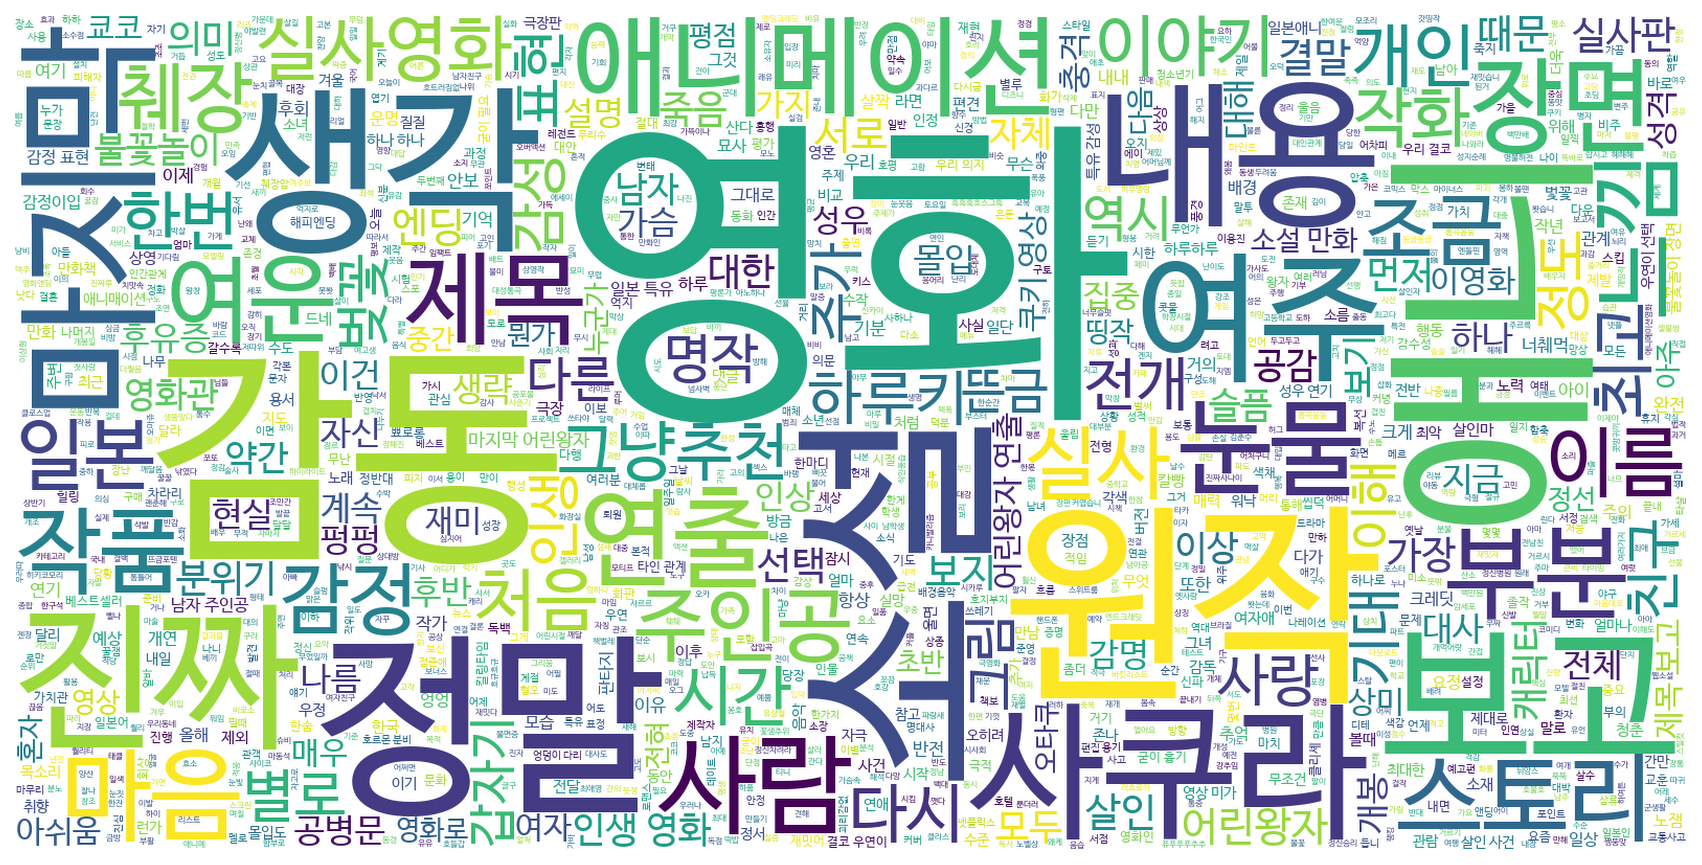

In [44]:
plt.figure(figsize = (15,15))
temp_best = ' '.join(np.concatenate(review_best.tokenized.reset_index(drop=True)))
wc = WordCloud(background_color='white', max_words = 2000, width = 1600, height = 800, font_path = fontpath).generate(temp_best)
plt.imshow(wc, interpolation = 'lanczos')
plt.axis('off')

---

In [45]:
review_worst['tokenized'] = review_worst['comment'].apply(tokenizer.nouns)
review_worst

comment                                          tokenized
0          진짜 적당히 사기들 쳐라 영화나 보고 평점 이따위로 올려놨는지는 모르겠다 ㅋㅋ                            [진짜, 사기, 영화, 보고, 평점, 로]
1         누가봐도 여자인데 남자라고 생각하는 설정좀 그만하자 제발어이없어서 몰입도 안된다                   [누가, 여자, 남자, 생각, 설정, 좀, 제발, 몰입도]
2                              제목부터 여타짜라니... 그냥 수준이하자나                               [제목, 타짜, 그냥, 수준, 이하]
3            대학생들이 삼삼오오 모여서 과제 제출용으로 만든 영화인줄 알았습니다하,,,                  [대학생, 삼삼오오, 모, 과제, 제출, 용, 영화인, 줄]
4    평점믿고갓다가폭망..ㅠ기대를크게하진않앗지만..스토리도10년전쯤만들어진느낌..신박한캐...          [평점, 다가, 폭망, 기대, 크게, 하진, 스토리, 박, 캐스팅, 전개]
..                                                 ...                                                ...
421             내만 당할수 없잖아 ㅋㅋㅋ  문재인이 같은 영화. 10점  만점. .                                [내, 문재인, 영화, 점, 만점]
422  예상했던 것보다 훨씬 충격적이고 깊이있는 스토리라인이 인상 깊었습니다. 단순 오락성...  [예상, 것, 충격, 깊이, 스토리, 라인, 인상, 단순, 오락, 도박, 영화, 원...
423                                      꼭 보세요! 재밌었어요!                                                [꼭]
424  새롭기도 하고 신선해서 좋았어요 특히 배우들 연기들도 장난아니고 조연분들까지 연기력...         [기도, 배우, 연기, 장난, 조연, 연기력, 추천, 오락, 영화로, 보기]
425  제 인생의 최고의 영화였습니다.진짜 강추드려요 안본사람은 있어도 한번만 본사람은 없...  [제, 인생, 최고, 영화, 진짜, 강추, 안, 사람, 한번, 사람, 스토리, 배우...

[426 rows x 2 columns]

In [46]:
review_worst['tokenized'] = review_worst['tokenized'].apply(lambda x: [item for item in x if len(item) > 1])
review_worst['tokenized']

0                                   [진짜, 사기, 영화, 보고, 평점]
1                          [누가, 여자, 남자, 생각, 설정, 제발, 몰입도]
2                                   [제목, 타짜, 그냥, 수준, 이하]
3                               [대학생, 삼삼오오, 과제, 제출, 영화인]
4                 [평점, 다가, 폭망, 기대, 크게, 하진, 스토리, 캐스팅, 전개]
                             ...                        
421                                        [문재인, 영화, 만점]
422    [예상, 충격, 깊이, 스토리, 라인, 인상, 단순, 오락, 도박, 영화, 원작, ...
423                                                   []
424           [기도, 배우, 연기, 장난, 조연, 연기력, 추천, 오락, 영화로, 보기]
425    [인생, 최고, 영화, 진짜, 강추, 사람, 한번, 사람, 스토리, 배우, 연기력,...
Name: tokenized, Length: 426, dtype: object

In [47]:
total_reviews = np.hstack(review_worst['tokenized'].values)

In [48]:
review_word_count = Counter(total_reviews)
print(review_word_count.most_common(20))

[('영화', 152), ('타짜', 58), ('연기', 50), ('배우', 48), ('스토리', 37), ('평점', 36), ('진짜', 34), ('연출', 24), ('생각', 23), ('재미', 20), ('감독', 20), ('이채영', 19), ('시간', 19), ('페미', 16), ('보고', 15), ('그냥', 15), ('제목', 14), ('정말', 14), ('정혜인', 14), ('수준', 13)]


In [49]:
review_worst.tokenized.reset_index(drop=True)

0                                   [진짜, 사기, 영화, 보고, 평점]
1                          [누가, 여자, 남자, 생각, 설정, 제발, 몰입도]
2                                   [제목, 타짜, 그냥, 수준, 이하]
3                               [대학생, 삼삼오오, 과제, 제출, 영화인]
4                 [평점, 다가, 폭망, 기대, 크게, 하진, 스토리, 캐스팅, 전개]
                             ...                        
421                                        [문재인, 영화, 만점]
422    [예상, 충격, 깊이, 스토리, 라인, 인상, 단순, 오락, 도박, 영화, 원작, ...
423                                                   []
424           [기도, 배우, 연기, 장난, 조연, 연기력, 추천, 오락, 영화로, 보기]
425    [인생, 최고, 영화, 진짜, 강추, 사람, 한번, 사람, 스토리, 배우, 연기력,...
Name: tokenized, Length: 426, dtype: object

In [50]:
temp_worst = ' '.join(np.concatenate(review_worst.tokenized.reset_index(drop=True)))
temp_worst

'진짜 사기 영화 보고 평점 누가 여자 남자 생각 설정 제발 몰입도 제목 타짜 그냥 수준 이하 대학생 삼삼오오 과제 제출 영화인 평점 다가 폭망 기대 크게 하진 스토리 캐스팅 전개 신분 그냥 타짜 매우 중반 꿈나라 장난 영화 평점 낚임 이채영 배우 애초 웹툰 영화 의문 영화감독 역시 이론 증명 도대체 생각 이영화 이해 가안 영화 진심 관객 평점 알바 보구 속편 생각 그냥 타짜 한번 타짜 타짜 타짜 미코 이름 평점 페미 차이 영화 대부분 망작 시나 바보 주인공 여자 보지 점주 걸캅스 영혼 진짜 잼임 레알 영화 배우 알바 때문 자서 짝퉁 영화 댓글 알바 알바 무조건 오든 인력 해바 지은 자고 평점 킬링타임 재미 굿굿 연말 평점 스토리 인물 배우 여배우 연기 인상 페미 뭐던 영화 재미 이름 장난 혹시 타짜 영화 연관 보은 바람 연말 재밋 영화 기대 생각 타자 시간 혼자 스트레스 제대로 잔뜩 혼자 추천 개봉 영화 호기심 시간 영화 코로나 시국 극장 영화 현실 이야기 아주 영화 생각 평점 연말 영화 최고 킬링타임 속편 재미 여배우 초반 오링 감독 카드 알구 구심 듬니 영화 스토리 스포일러 수가 내용 유튜브 리뷰 사람과 영화 프로 내용 홍보 진짜 대본 보고 참여 삼류 배우 무신 와중 속편 예고 전개 스토리 이해 부분 설마 페미 주작 과연 알바 페미 영화 보고 평점 사람 추천 영화 근래 보기 화이 영화 체적 재밋 감동 스토리 연기 예산 영화 생각 맥주 한잔 보기 평점 반신반의 영화 생각 평점 댓글 테러 여배우 연기 연출 평점 무시 삼류 영화 와인 만하 연출 각본 수준 미달 진짜 생각 지금 보고 타짜 도박 소재 미미 가족 비극 오자 가족사 이유 빌런 이야기 평면 드라마 이기 때문 모로 영화 계집 우르르 평점 조작 감동 추천 예산 영화 불구 정말 기대 타짜 재미 감동 관람 생각 영화 정혜인 아무 생각 시작 영화 자극 장면 타짜 생각 는걸 작품 의심 배우 배우 저런 영화 마지막 설마 노잼 진짜 핵핵 노잼 이건 전도연 김혜수 인생 최악 영화 타짜 시리즈 폭망 정말 우리 고등학교 

(-0.5, 1599.5, 799.5, -0.5)

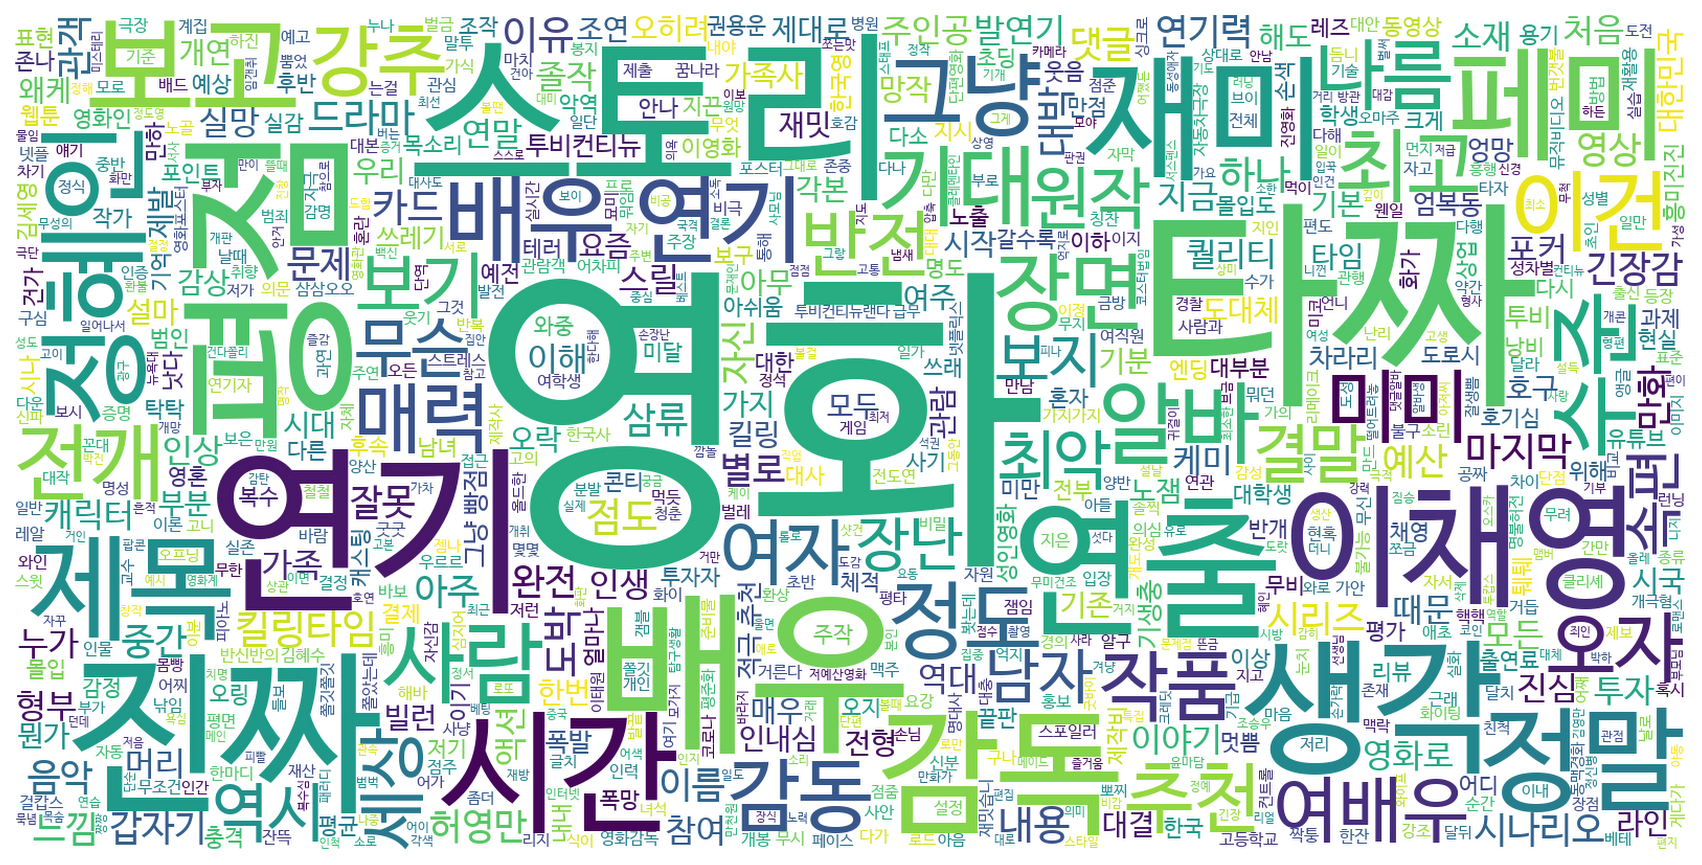

In [51]:
plt.figure(figsize = (15,15))
temp_worst = ' '.join(np.concatenate(review_worst.tokenized.reset_index(drop=True)))
wc = WordCloud(background_color='white', max_words = 2000, width = 1600, height = 800, font_path = fontpath).generate(temp_worst)
plt.imshow(wc, interpolation = 'lanczos')
plt.axis('off')